# Travailler avec du JSON

In [3]:
from IPython.display import HTML
import numpy as np
import urllib
import bs4 #this is beautiful soup
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 20)
import pickle
%matplotlib inline

import seaborn as sns
import json

## Recuperer le JSon sur la page web

In [4]:
# On enregistre l'adresse web du JSON
jsonAddress = 'http://data.beta.metropolegrenoble.fr/dataset/a91c37b7-daa9-4252-8b1c-0ec2e5f5b8a5/resource/2a8eb7b4-4940-4cf0-b823-d6f34c24060d/download/imposition.json'
# On recupère les données en gérant les exceptions
try:
    jsonDataString = urllib.request.urlopen(jsonAddress).read()
except urllib.request.HTTPError:
    print("HTTPError:")
except urllib.request.URLError:
    print("URLError:")
  

In [5]:
print(jsonDataString[:200])


b'{"data":[{"taux":0.0531,"annee":"2000","type":"Taux TH 2000-2014","Commune":"Bresson"},{"taux":0.0816,"annee":"2001","type":"Taux TH 2000-2014","Commune":"Bresson"},{"taux":0.1066,"annee":"2002","type'


## Du texte vers le JSON

In [6]:
# decodage bytes -> String -> JSON
jsonData = json.loads(jsonDataString.decode(encoding='UTF-8'))


In [7]:
jsonData.keys()

dict_keys(['data'])

## Du JSON vers le DataFrame

In [8]:
data = jsonData['data']
dataframe = pd.DataFrame(data)
dataframe.head()

,Commune,annee,taux,type
0,Bresson,2000,0.0531,Taux TH 2000-2014
1,Bresson,2001,0.0816,Taux TH 2000-2014
2,Bresson,2002,0.1066,Taux TH 2000-2014
3,Bresson,2003,0.1087,Taux TH 2000-2014
4,Bresson,2004,0.1103,Taux TH 2000-2014


## Quelques statistiques descriptives

In [9]:
# Taux moyen par commune et par type de taxe sur la période
taxes = dataframe.type.unique()

tauxMoyenCommuneTaxe = pd.concat(
    [dataframe[dataframe['type'] == t].groupby(dataframe['Commune']).mean() for t in taxes],
    axis = 1,
    join = 'inner')
tauxMoyenCommuneTaxe.columns=taxes
tauxMoyenCommuneTaxe = tauxMoyenCommuneTaxe.assign(Moyenne = tauxMoyenCommuneTaxe.mean(axis=1))
tauxMoyenCommuneTaxe = tauxMoyenCommuneTaxe.sort_values(by=('Moyenne'))
tauxMoyenCommuneTaxe

,Taux TH 2000-2014,Taux FNB 2000-2014,Taux TEOM 2000-2014,Taux TFB 2000-2014,Moyenne
Commune,,,,,
Corenc,0.107400,0.254847,0.042757,0.240473,0.161369
Brié-et-Angonnes,0.072400,0.320400,0.070800,0.190200,0.163450
Champagnier,0.045300,0.474600,0.070800,0.082300,0.168250
Bresson,0.091929,0.386157,0.070800,0.182843,0.182932
Veurey-Voroize,0.082267,0.481633,0.037433,0.152073,0.188352
Notre-Dame-de-Mésage,0.073000,0.465500,0.070800,0.155000,0.191075
Mont-Saint-Martin,0.066000,0.572200,0.070800,0.056200,0.191300
Vaulnaveys-le-Bas,0.071000,0.518600,0.070800,0.107900,0.192075
Jarrie,0.079100,0.481000,0.070800,0.187300,0.204550


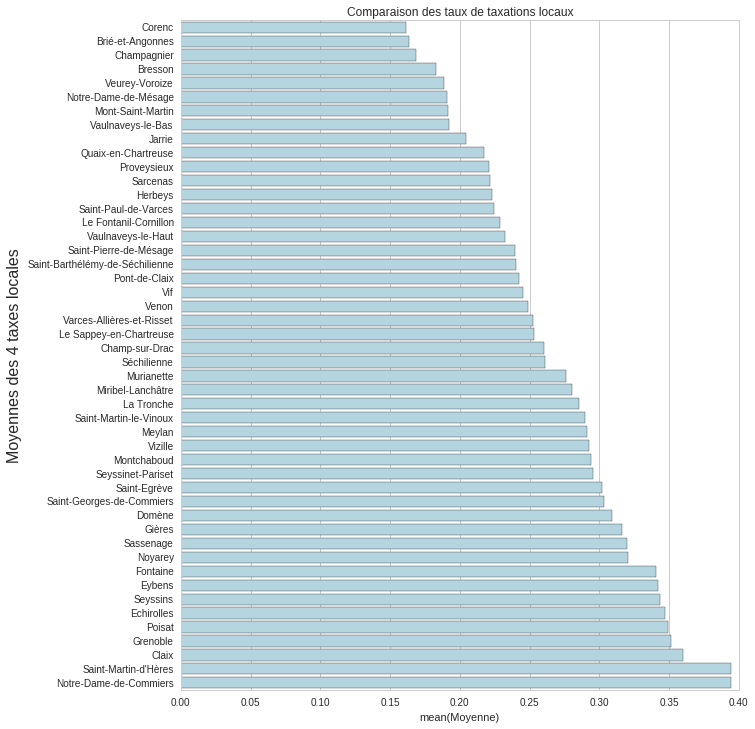

In [10]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 12))
    sns.barplot(data = tauxMoyenCommuneTaxe,y = tauxMoyenCommuneTaxe.index,
                x="Moyenne",color="lightblue")    
    plt.title('Comparaison des taux de taxations locaux')
    plt.ylabel('Moyennes des 4 taxes locales', fontsize=16)
    

In [12]:
tauxMoyenCommuneTaxe.corr()

,Taux TH 2000-2014,Taux FNB 2000-2014,Taux TEOM 2000-2014,Taux TFB 2000-2014,Moyenne
Taux TH 2000-2014,1.000000,0.348692,-0.318792,0.787624,0.645032
Taux FNB 2000-2014,0.348692,1.000000,-0.266939,0.473345,0.921406
Taux TEOM 2000-2014,-0.318792,-0.266939,1.000000,-0.455611,-0.334206
Taux TFB 2000-2014,0.787624,0.473345,-0.455611,1.000000,0.764331
Moyenne,0.645032,0.921406,-0.334206,0.764331,1.000000
